# Neste Lab vamos utilizar o TF para resolver um problema simples de regressão

Você sabe o que é uma **função linear**? É uma função cuja forma é **y = Ax + B**

O que vamos fazer neste laboratório é encontrar uma função linear que explique o comportamento de alguns dados, e vamos utilizar o TensorFlow para realizar os cálculos até encontrar a melhor função

Encontrar a função significa encontrar os coeficientes **A e B** da função. 

Primeiro vamos elaborar uma massa de dados aleatórias que servirá de base para o nosso problema

In [1]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

In [2]:
# Vamos gerar dados aleatórios de X e Y
number_of_points = 200
x_point = []
y_point = []
a = 0.33
b = 0.45
# Através da função random.normal do NumPy, geramos 300 pontos aleatórios em torno da equação de regressão y = 0.22x + 0.78:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

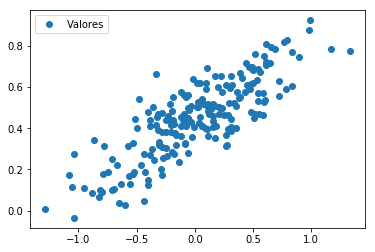

In [3]:
# Visualizando os pontos de dados gerados
plt.plot(x_point,y_point, 'o', label = 'Valores')
plt.legend()
plt.show()

Vamos agora construir o algoritmo de aprendizagem

Para isso vamos definir as duas variáveis do nosso problema e nossa equação no formato do TF

Vamos utilizar como base para nossa equação os valores de x conhecidos

In [4]:
A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = A * x_point + B

Em seguida, vamos definir a função de custo, ou seja, uma função que mede o quão longe uma solução proposta está longe do valor previsto

In [5]:
# Neste caso estamos utilizando a fórmula do erro quadrático médio
cost_function = tf.reduce_mean(tf.square(y - y_point))
tf.summary.scalar('cost', cost_function)

<tf.Tensor 'cost:0' shape=() dtype=string>

Em seguida, precisamos de uma função de otimização, a qual vai calcular os valores de A e B que minimizam a função de custo

In [6]:
# Neste caso estamos utilizando a função gradiente descendente
optimizer = tf.train.GradientDescentOptimizer(0.5)

Podemos então definir como será o treinamento: vamos utilizar a função de otimização para minimizar a função de custo

In [7]:
train = optimizer.minimize(cost_function)

Em seguida, vamos rodar o modelo criado com o Tensorflow

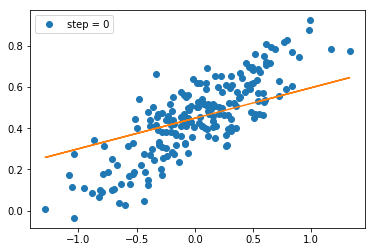

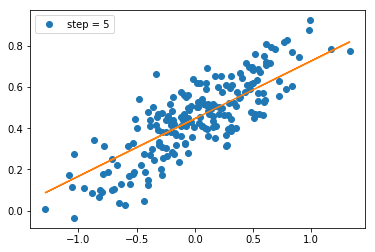

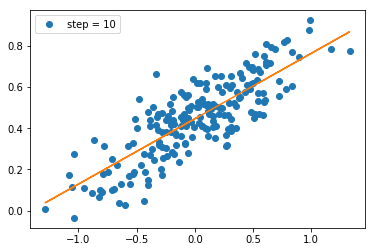

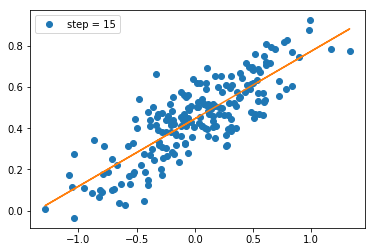

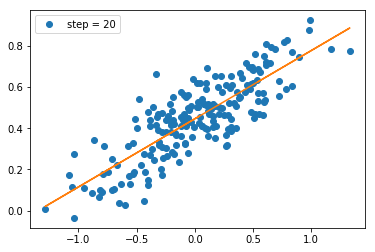

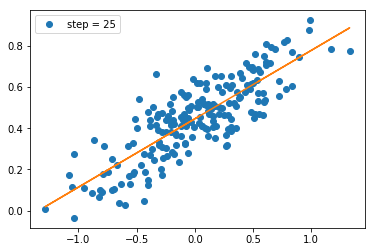

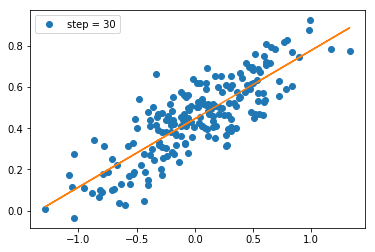

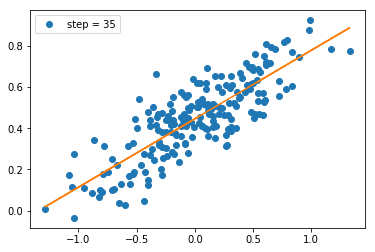

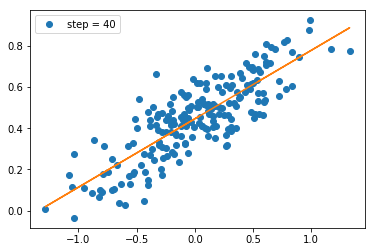

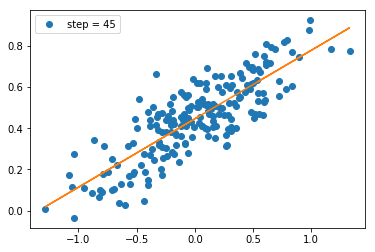

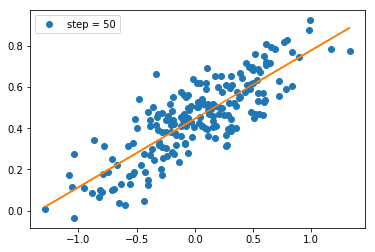

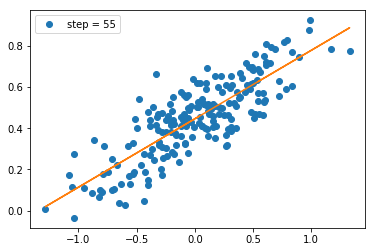

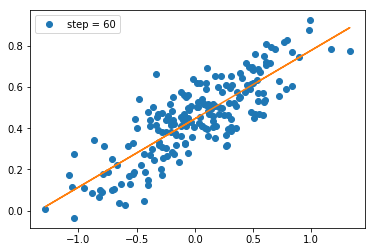

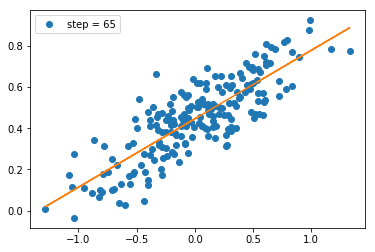

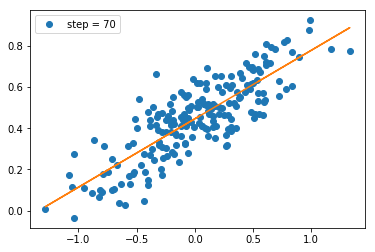

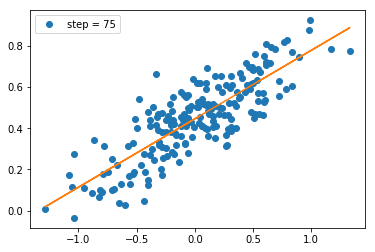

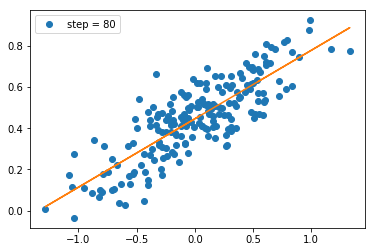

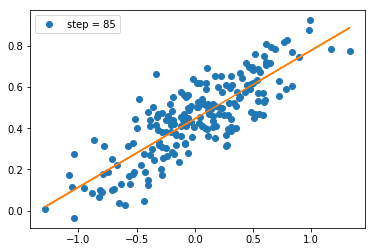

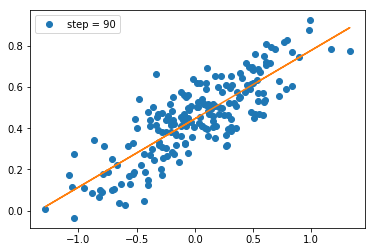

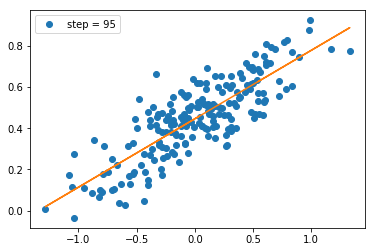

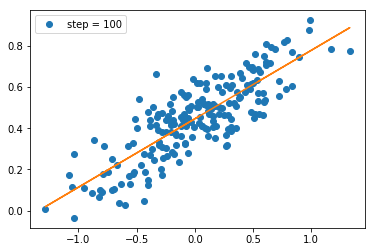

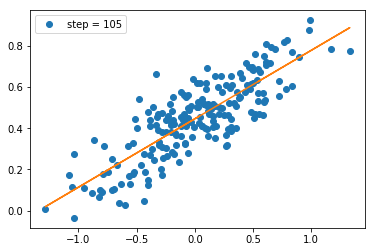

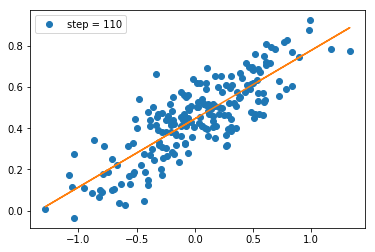

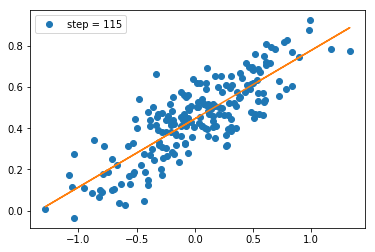

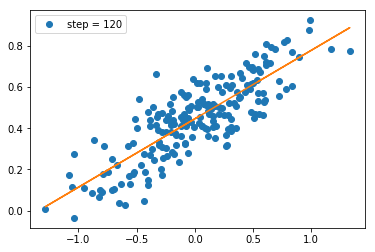

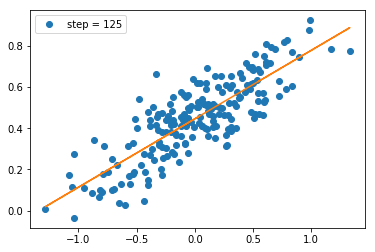

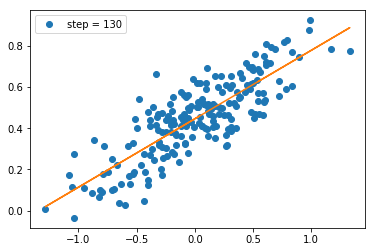

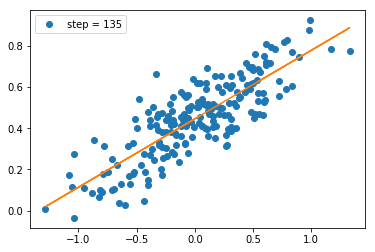

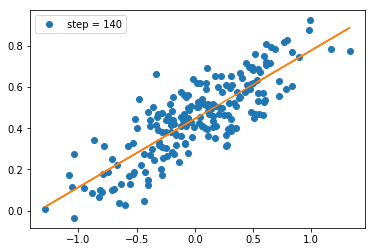

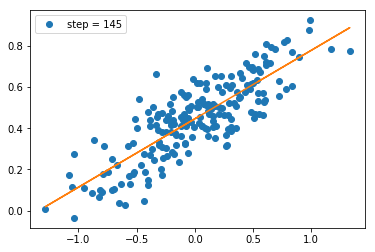

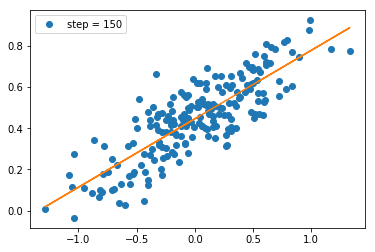

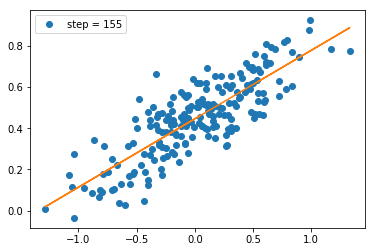

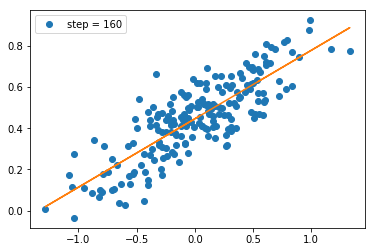

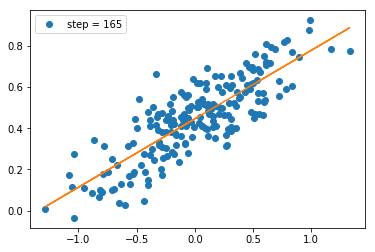

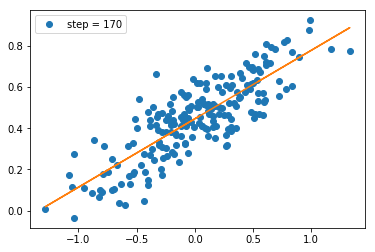

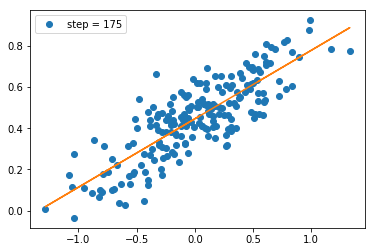

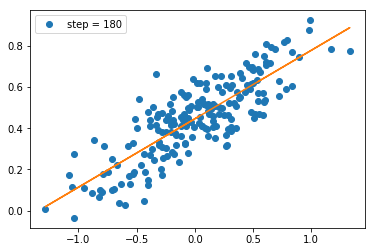

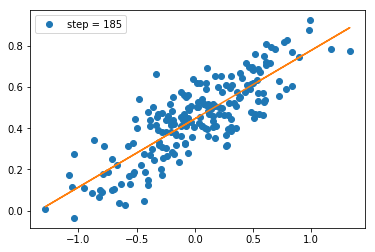

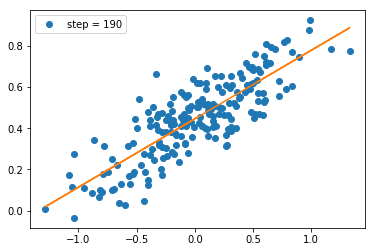

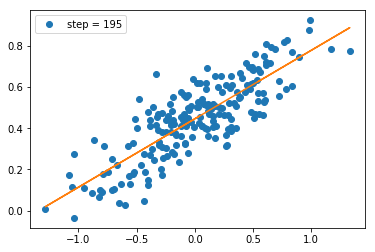

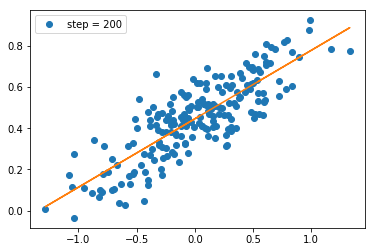

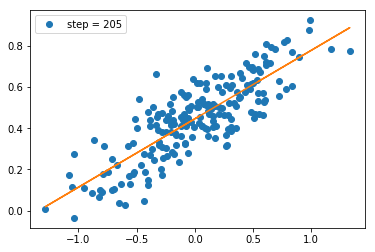

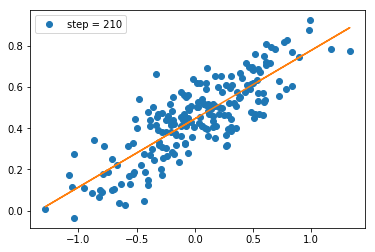

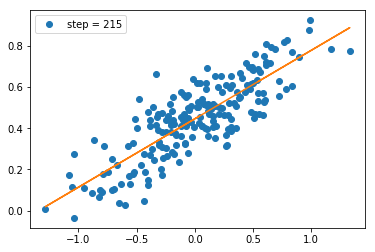

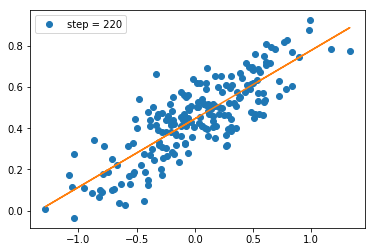

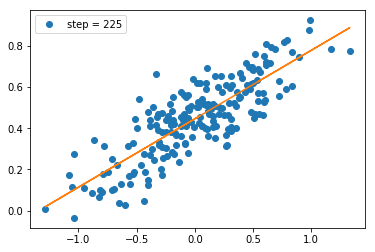

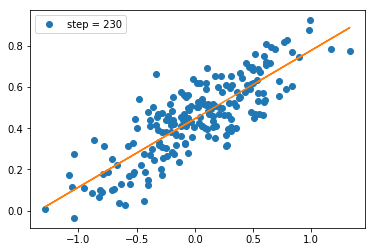

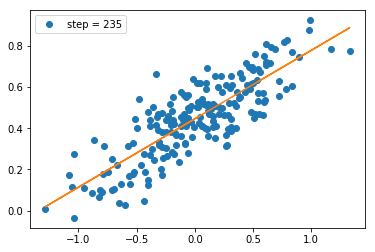

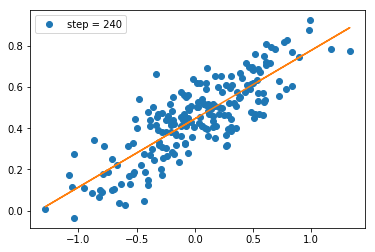

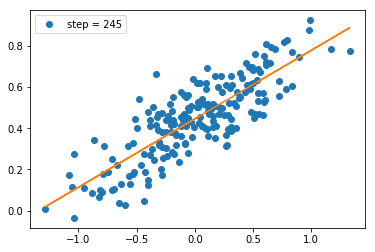

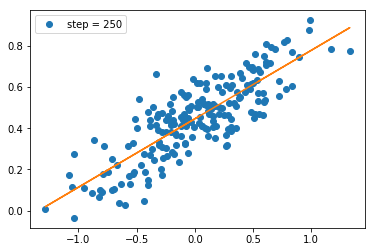

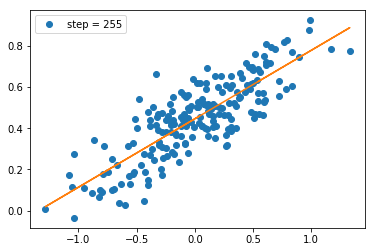

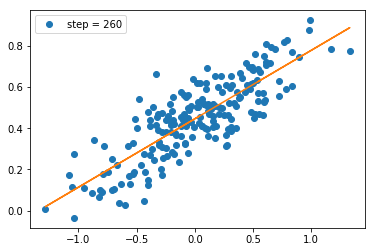

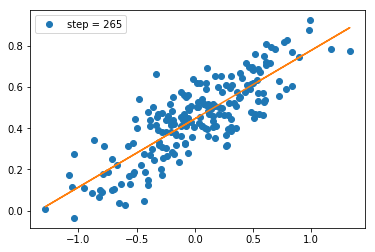

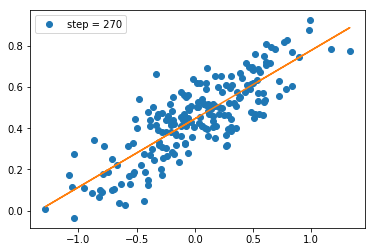

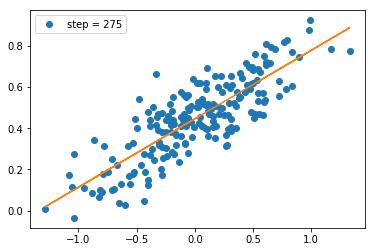

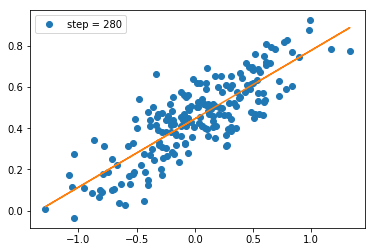

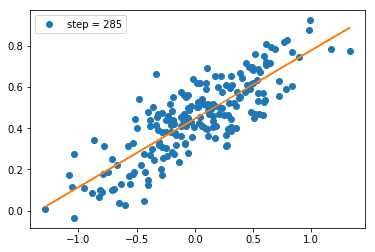

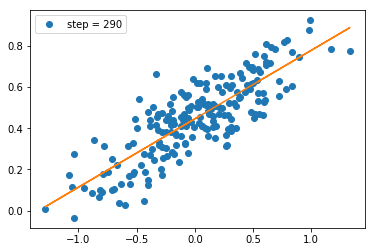

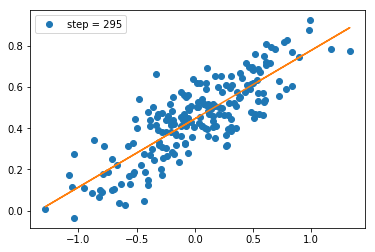

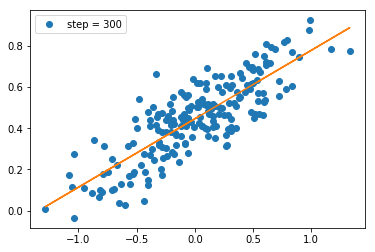

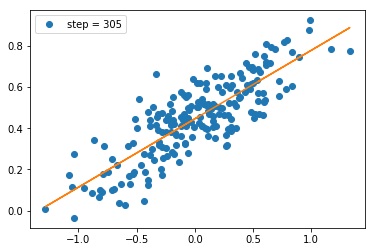

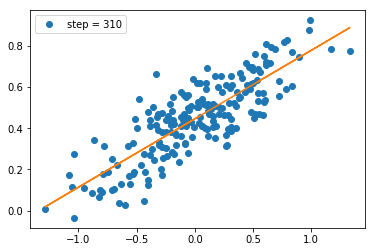

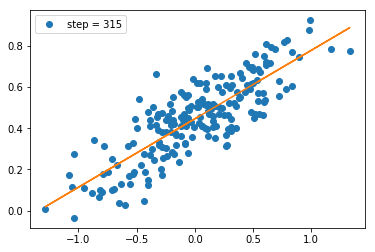

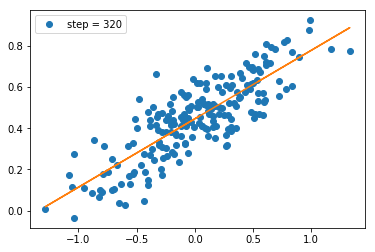

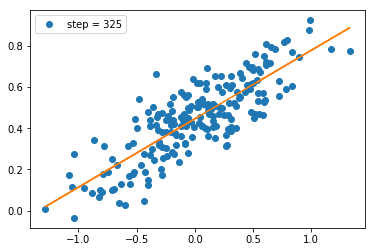

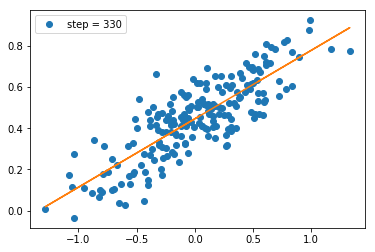

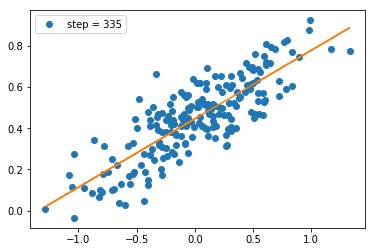

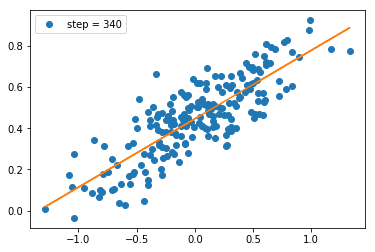

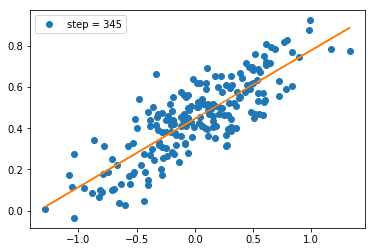

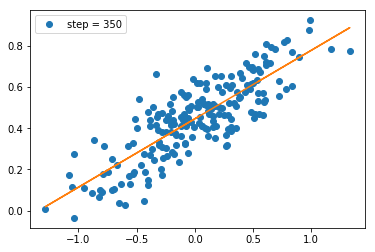

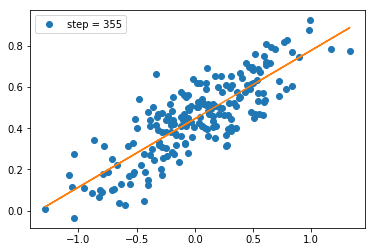

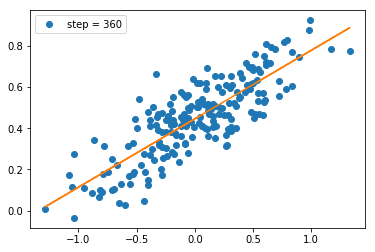

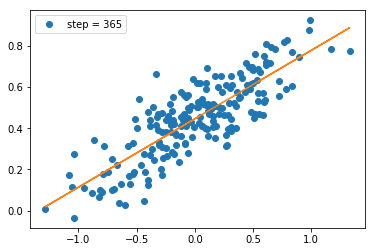

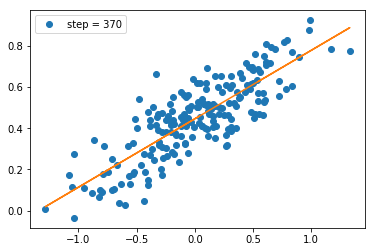

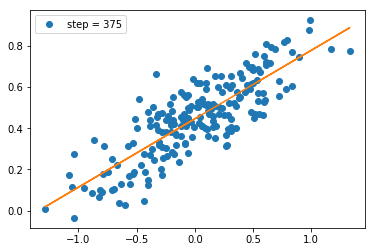

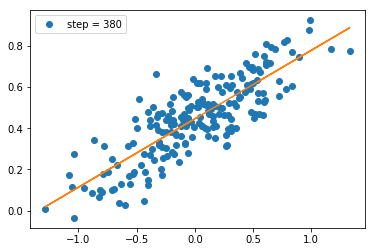

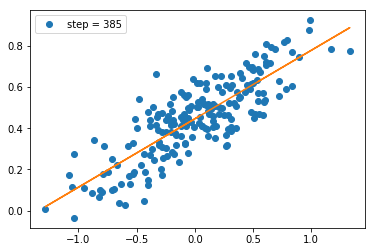

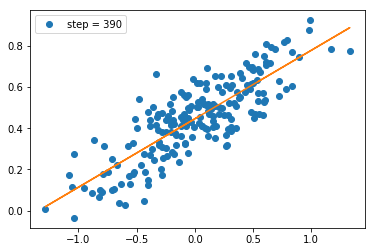

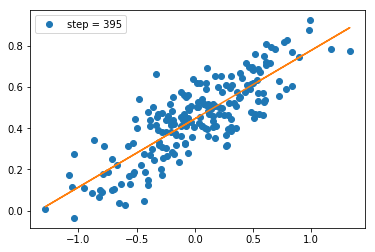

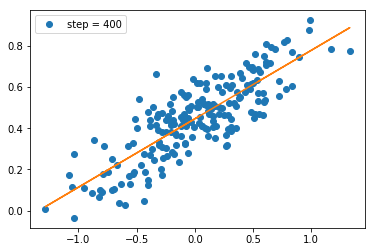

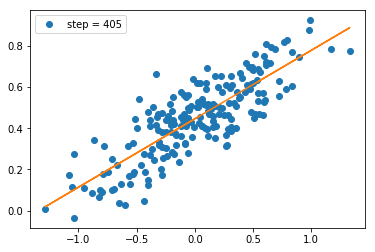

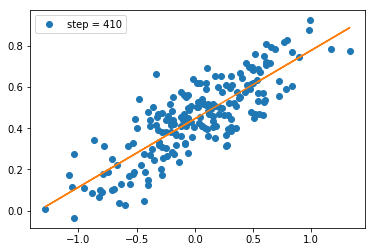

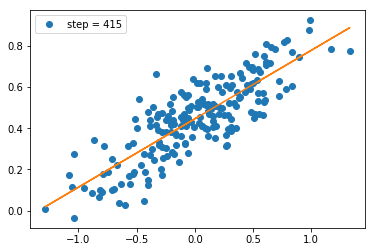

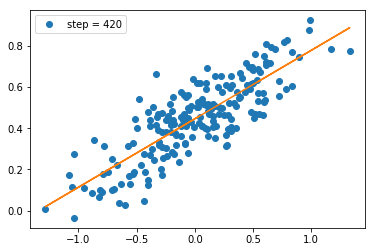

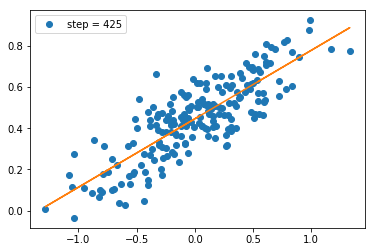

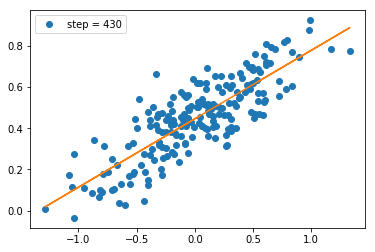

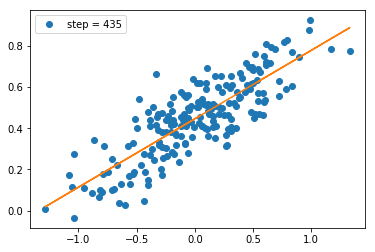

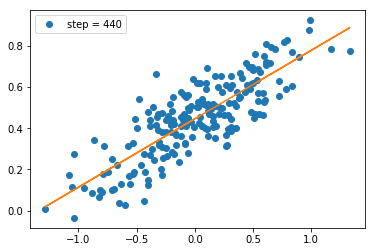

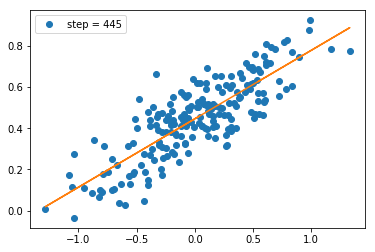

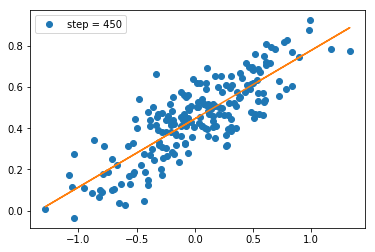

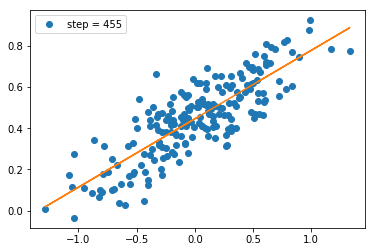

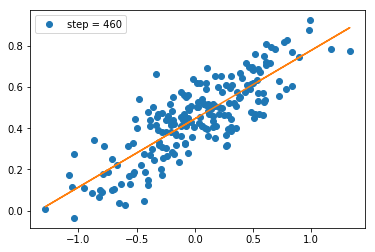

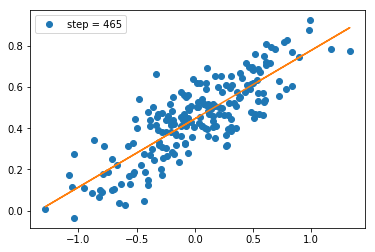

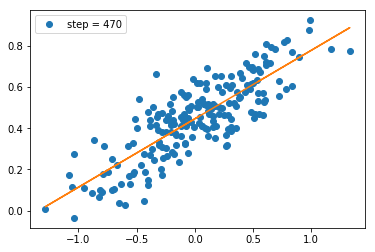

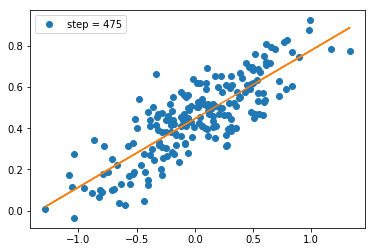

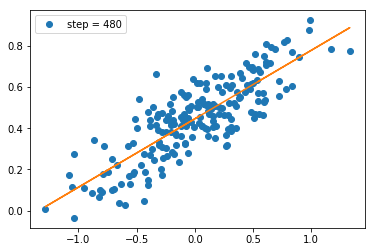

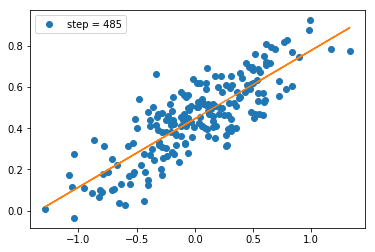

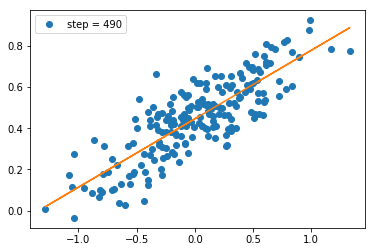

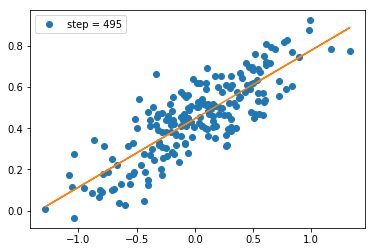

In [8]:
# Inicializando as variaveis
init = tf.global_variables_initializer()
# Executando o treinamento dentro de uma sessao do TF
with tf.Session() as sess:
    # Inicializando as variaveis
    sess.run(init)
    merged = tf.summary.merge_all()
    now = datetime.now()
    writer = tf.summary.FileWriter('logs_07/'+now.strftime("%Y%m%d-%H%M%S"), sess.graph)
    # Rodando vários passos de treinamento
    for step in range(0,500):
        train_summary, _ = sess.run([merged, train])
        writer.add_summary(train_summary, step)
        # A cada 5 passos, imprime a função linear com os valores obtidos de A e B
        if (step %5) == 0:
            plt.plot(x_point, y_point, 'o',label = 'step = {}'.format(step))
            plt.plot(x_point, sess.run(A) * x_point + sess.run(B))
            plt.legend()
            plt.show()

In [9]:
# Armazenando os dados da sessão em um diretório de log para visualização do grafo no TensorBoard
with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("logs_07", session.graph)
    session.run(init)
    session.run(y)

Abra o TensorBoard utilizando o comando abaixo e veja o grafo gerado:
    
python -m tensorboard.main --logdir="logs_07"

# Exercício:

Modifique a quantidade de passos de treinamento para ver se consegue melhorar a acurácia

Qual o melhor percentual foi obtido?